##Import thư viện

In [684]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [685]:
# 1. Importing necessary libraries
import numpy as np
import pandas as pd
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Đọc dữ liệu




In [686]:
# 2. Load data
#df = pd.read_excel('/content/drive/MyDrive/PTDLKD/đồ án/ADAUSDT.xlsx')
#df = pd.read_excel('/content/drive/MyDrive/PTDLKD/đồ án/BNBUSDT.xlsx')
df = pd.read_excel('/content/drive/MyDrive/PTDLKD/đồ án/ETHUSDT.xlsx')
df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,28-03-2023,1715.21,1726.94,1701.13,1716.71,47871.755,29-03-2023,8.200403e+07,65611,25396.030,4.349634e+07,0
1,27-03-2023,1773.88,1780.48,1686.13,1715.22,570563.502,28-03-2023,9.871980e+08,810253,274628.430,4.751759e+08,0
2,26-03-2023,1741.88,1801.00,1739.31,1773.88,354933.237,27-03-2023,6.276605e+08,592618,178518.267,3.156919e+08,0
3,25-03-2023,1749.57,1763.23,1713.09,1741.88,355679.374,26-03-2023,6.203420e+08,620651,174749.283,3.048374e+08,0
4,24-03-2023,1813.78,1818.99,1726.40,1749.57,564770.142,25-03-2023,1.001546e+09,855600,283157.349,5.022221e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,25-03-2019,136.12,136.83,131.60,133.98,230880.285,26-03-2019,3.108245e+07,98246,113167.353,1.524183e+07,0
1496,24-03-2019,137.28,137.37,134.75,136.09,198490.451,25-03-2019,2.704232e+07,82361,104851.448,1.428892e+07,0
1497,23-03-2019,135.92,138.21,135.60,137.28,174710.431,24-03-2019,2.392257e+07,73884,89401.143,1.224177e+07,0
1498,22-03-2019,134.85,137.20,134.29,135.98,186119.747,23-03-2019,2.530912e+07,79782,86857.863,1.180783e+07,0


In [687]:
# Convert Close time column to date format
df["Close time"] = pd.to_datetime(df["Close time"], format="%d-%m-%Y")
# Sort data by Close time column
df = df.sort_values("Close time")
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,21-03-2019,139.04,139.55,131.21,134.85,312531.394,2019-03-22,4.263594e+07,113797,152957.118,2.087331e+07,0
1,22-03-2019,134.85,137.20,134.29,135.98,186119.747,2019-03-23,2.530912e+07,79782,86857.863,1.180783e+07,0
2,23-03-2019,135.92,138.21,135.60,137.28,174710.431,2019-03-24,2.392257e+07,73884,89401.143,1.224177e+07,0
3,24-03-2019,137.28,137.37,134.75,136.09,198490.451,2019-03-25,2.704232e+07,82361,104851.448,1.428892e+07,0
4,25-03-2019,136.12,136.83,131.60,133.98,230880.285,2019-03-26,3.108245e+07,98246,113167.353,1.524183e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,24-03-2023,1813.78,1818.99,1726.40,1749.57,564770.142,2023-03-25,1.001546e+09,855600,283157.349,5.022221e+08,0
1496,25-03-2023,1749.57,1763.23,1713.09,1741.88,355679.374,2023-03-26,6.203420e+08,620651,174749.283,3.048374e+08,0
1497,26-03-2023,1741.88,1801.00,1739.31,1773.88,354933.237,2023-03-27,6.276605e+08,592618,178518.267,3.156919e+08,0
1498,27-03-2023,1773.88,1780.48,1686.13,1715.22,570563.502,2023-03-28,9.871980e+08,810253,274628.430,4.751759e+08,0


In [688]:
# Convert the 'Date' column to datetime format
df['Close time'] = pd.to_datetime(df['Close time'])
# Set the 'Date' column as the index value
df.set_index('Close time', inplace=True)

## Chia dữ liệu để huấn luyện

In [689]:
# 3. Scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
data_scaled=scaler.fit_transform(df[['Close']])
data_scaled

array([[0.00575087],
       [0.00599129],
       [0.00626787],
       ...,
       [0.35446878],
       [0.34198836],
       [0.34230537]])

In [690]:
# Split the data into training, testing and validation sets
train_size = int(0.7 * len(data_scaled))
val_size = int(0.1 * len(data_scaled))
test_size= len(data_scaled) - train_size - val_size

train_data = data_scaled[:train_size]
val_data = data_scaled[train_size:train_size+val_size]
test_data = data_scaled[train_size+val_size:]

In [691]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        dataX.append(dataset[i:(i+time_step), 0])
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [692]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


##Model training and testing

### Train

In [693]:
# 4. Create a new model with these parameters
gbt = GradientBoostingRegressor(learning_rate=0.2, n_estimators=500, min_samples_split=6, max_depth=5, min_samples_leaf=2, random_state=0)
gbt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                          min_samples_split=6, n_estimators=500,
                          random_state=0)

###Test

In [694]:
# 5. Scaling the data back to the original range
y_train_inv = scaler.inverse_transform(y_train.reshape(-1,1))
y_val_inv = scaler.inverse_transform(y_val.reshape(-1,1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

In [695]:
# Predicting on train, test, and val data
y_pred_train=gbt.predict(X_train)
y_pred_val=gbt.predict(X_val)
y_pred_test=gbt.predict(X_test)

In [696]:
# Scaling the predictions back to the original range
y_pred_train_inv = scaler.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_val_inv = scaler.inverse_transform(y_pred_val.reshape(-1,1))
y_pred_test_inv = scaler.inverse_transform(y_pred_test.reshape(-1,1))

## Dự đoán 30 ngày tiếp theo

In [697]:
# 6. Dự báo 30 ngày tiếp theo
X_input=test_data[-100:].reshape(1,-1)
X_input.shape
temp_input=list(X_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        next_date = gbt.predict(X_input)
        print("{} day output {}".format(i,next_date))
        temp_input.extend(next_date.tolist())
        temp_input=temp_input[1:]
        lst_output.extend(next_date.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps))
        next_date = gbt.predict(X_input)
        print(next_date[0])
        temp_input.extend(next_date.tolist())
        print(len(temp_input))
        lst_output.extend(next_date.tolist())
        i=i+1

0.3985599218809729
101
1 day input [0.23597495 0.23530263 0.23613877 0.23662386 0.23671322 0.23630898
 0.23835146 0.23482818 0.23027514 0.23247506 0.23236869 0.23154744
 0.23244315 0.23534943 0.23546645 0.24447678 0.24327257 0.24708095
 0.24600226 0.25155314 0.25798483 0.26122515 0.27266519 0.27830967
 0.2858158  0.30681509 0.30737251 0.31256808 0.31014902 0.29863026
 0.30706827 0.32992494 0.32314645 0.3233124  0.32306773 0.30810653
 0.32001464 0.31770621 0.31696793 0.31153833 0.32698887 0.31028305
 0.31435313 0.32634208 0.32664845 0.33098873 0.33159722 0.32364856
 0.32051462 0.33258655 0.32820372 0.30584703 0.29897706 0.30439177
 0.29935364 0.29731328 0.30805122 0.33341418 0.32552509 0.33744596
 0.33696725 0.33444181 0.33944589 0.33018876 0.32665271 0.328225
 0.31913382 0.31632115 0.326274   0.32459108 0.31858703 0.33135042
 0.32765693 0.31097452 0.31039582 0.30993839 0.31020646 0.30938096
 0.30308755 0.28286271 0.2805479  0.2902348  0.31328933 0.33310143
 0.33862251 0.32810372 0.3331

In [698]:
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1,1))
print('Giá tiền ảo Close 30 ngày tiếp theo:')
print(lst_output)

Giá tiền ảo Close 30 ngày tiếp theo:
[[1981.11540243]
 [2139.37162283]
 [2221.87168669]
 [2245.44342645]
 [2282.96225181]
 [2227.88721175]
 [2225.33697879]
 [2259.98221218]
 [2265.97419278]
 [2269.33735165]
 [2259.84443916]
 [2267.6697661 ]
 [2269.77052559]
 [2258.29518287]
 [2279.58328163]
 [2254.98271317]
 [2295.17909014]
 [2260.17454868]
 [2258.8479385 ]
 [2253.00402166]
 [2270.63697921]
 [2268.66995391]
 [2275.81538683]
 [2287.08545404]
 [2283.10280679]
 [2285.60481395]
 [2307.66081434]
 [2391.22360904]
 [2420.20128274]
 [2345.6443572 ]]


##Trực quan hóa

In [699]:
# Convert integer indexes back to datetime
train_data_index = df.index[:train_size]
val_data_index = df.index[train_size:train_size+val_size]
val_data_index_pred = df.index[train_size+time_step+1:train_size+val_size]
test_data_index = df.index[train_size+val_size:train_size+val_size+test_size]
test_data_index_pred = df.index[train_size+val_size+time_step+1:train_size+val_size+test_size]
predict_data_index = pd.date_range(start=df.index[-1], periods=30+1, closed='right')

<ipython-input-699-a223220271c8>:7: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  predict_data_index = pd.date_range(start=df.index[-1], periods=30+1, closed='right')


In [700]:
# 7. Đánh giá độ chính xác validate, test
test_RMSE = mean_squared_error(y_test_inv, y_pred_test_inv, squared=False)
test_MAE = mean_absolute_error(y_pred_test_inv,y_test_inv)
print('Testing RMSE', test_RMSE)
print('Testing MAE:', test_MAE)
valid_RMSE = mean_squared_error(y_val_inv, y_pred_val_inv, squared=False)
valid_MAE = mean_absolute_error(y_pred_val_inv,y_val_inv)
print('Validation RMSE', valid_RMSE)
print('Validation MAE:', valid_MAE)

Testing RMSE 390.8685094062362
Testing MAE: 363.5710781324261
Validation RMSE 159.85772791207893
Validation MAE: 125.80765093395937


Testing RMSE 390.8685094062362
Testing MAE: 363.5710781324261
Validation RMSE 159.85772791207893
Validation MAE: 125.80765093395937


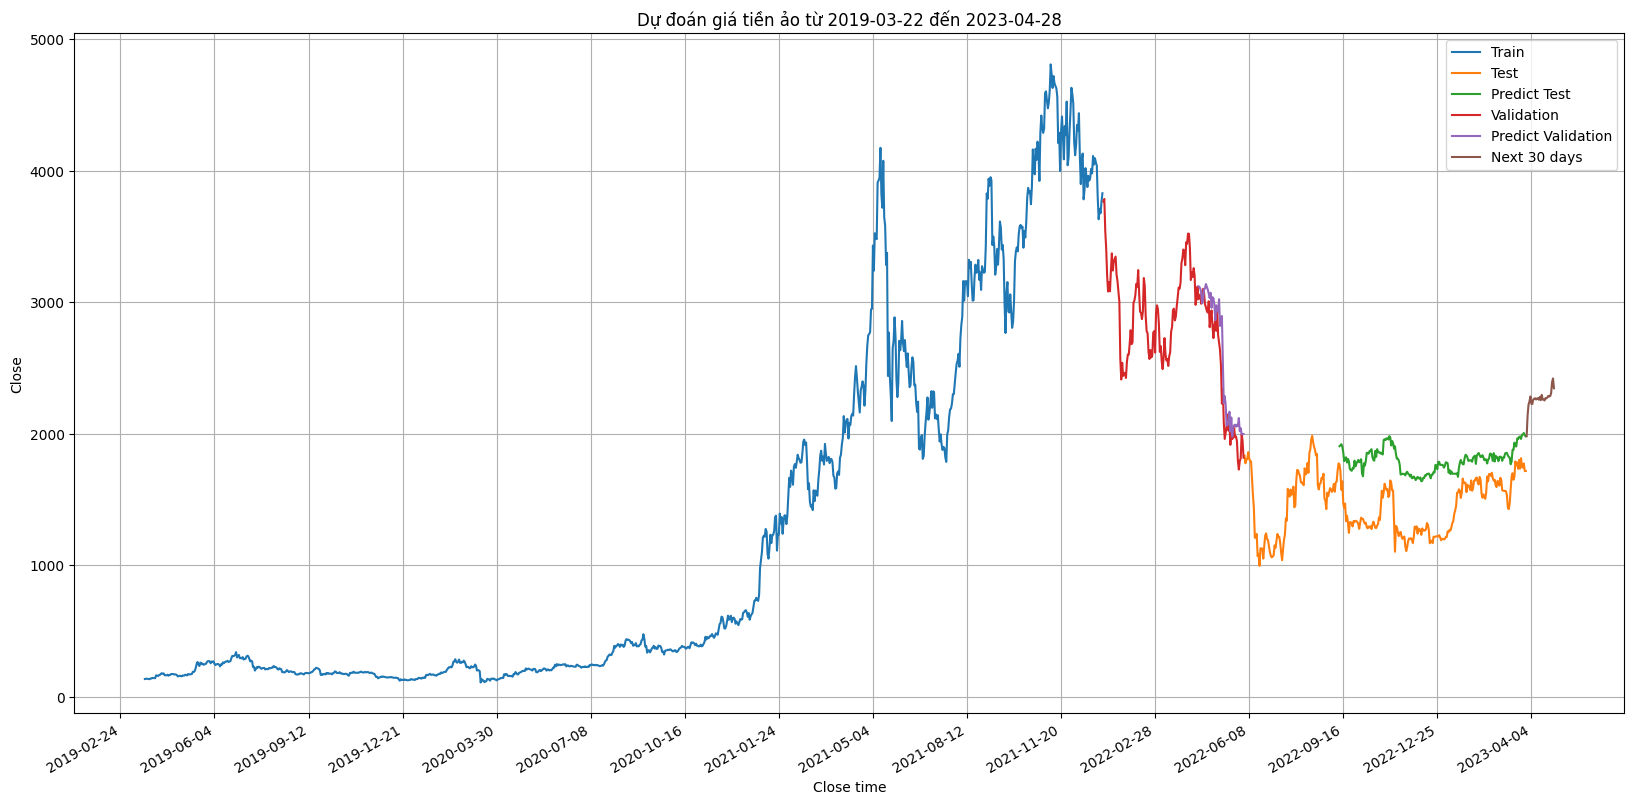

In [701]:
# Đánh giá độ chính xác validate, test
test_RMSE = mean_squared_error(y_test_inv, y_pred_test_inv, squared=False)
test_MAE = mean_absolute_error(y_pred_test_inv,y_test_inv)
print('Testing RMSE', test_RMSE)
print('Testing MAE:', test_MAE)
valid_RMSE = mean_squared_error(y_val_inv, y_pred_val_inv, squared=False)
valid_MAE = mean_absolute_error(y_pred_val_inv,y_val_inv)
print('Validation RMSE', valid_RMSE)
print('Validation MAE:', valid_MAE)

# 8. Biểu đồ trực quan
plt.figure(figsize=(20, 10))
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')
plt.plot(test_data_index_pred, y_pred_test_inv, label='Predict Test')
plt.plot(val_data_index, scaler.inverse_transform(val_data), label='Validation')
plt.plot(val_data_index_pred, y_pred_val_inv, label='Predict Validation')
plt.plot(predict_data_index, lst_output, label='Next 30 days')
plt.grid()
plt.title(f"Dự đoán giá tiền ảo từ {train_data_index[0].strftime('%Y-%m-%d')} đến {predict_data_index[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Close time")
plt.ylabel("Close")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()